# Cristiano Ronaldo  Career Analysis

Cristiano Ronaldo's Portugal career is a saga of leadership and excellence. Since his debut in 2003, Ronaldo has been the driving force behind Portugal's international success. He led Portugal to the final of UEFA Euro 2004, won UEFA Euro 2016, and guided the team to the semi-finals of the 2006 FIFA World Cup. Ronaldo's iconic performances, including a record-breaking goal tally, have solidified his status as Portugal's all-time leading goal scorer. His relentless pursuit of greatness and unwavering commitment to the national team have made him an inspiration to millions, etching his name in footballing folklore as a true legend of the game.

# Exploratory Data Analysis (EDA)

In [38]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [39]:
# Reading the dataset
df1 = pd.read_csv('goalscorers.csv')
# Display the first few rows of the DataFrame
df1.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [40]:
# Reading the dataset
df2 = pd.read_csv('results.csv')
# Display the first few rows of the DataFrame
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [41]:
# Reading the dataset
df3 = pd.read_csv('shootouts.csv')
# Display the first few rows of the DataFrame
df3.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46442 non-null  object
 1   home_team   46442 non-null  object
 2   away_team   46442 non-null  object
 3   home_score  46442 non-null  int64 
 4   away_score  46442 non-null  int64 
 5   tournament  46442 non-null  object
 6   city        46442 non-null  object
 7   country     46442 non-null  object
 8   neutral     46442 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           605 non-null    object
 1   home_team      605 non-null    object
 2   away_team      605 non-null    object
 3   winner         605 non-null    object
 4   first_shooter  222 non-null    object
dtypes: object(5)
memory usage: 23.8+ KB


In [45]:
# Merge DataFrame 1 and DataFrame 2 based on 'date', 'home_team', and 'away_team'
merged_df = pd.merge(df1, df2, on=['date', 'home_team', 'away_team'], how='left')

# Merge with DataFrame 3 based on 'date', 'home_team', and 'away_team'
merged_df = pd.merge(merged_df, df3, on=['date', 'home_team', 'away_team'], how='left')

# Display merged DataFrame
print(merged_df.head())

         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

  own_goal penalty  home_score  away_score    tournament          city  \
0    False   False           0           4  Copa América  Buenos Aires   
1    False   False           0           4  Copa América  Buenos Aires   
2    False   False           0           4  Copa América  Buenos Aires   
3    False   False           0           4  Copa América  Buenos Aires   
4    False   False           6           1  Copa América  Buenos Aires   

     country  neutral winner first_shooter  
0  Argentina     True    NaN           NaN  
1  Argentina  

In [46]:
merged_df.head(20)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,NaN,NaN
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,NaN,NaN
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,NaN,NaN
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,NaN,NaN
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6,1,Copa América,Buenos Aires,Argentina,False,NaN,NaN
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False,6,1,Copa América,Buenos Aires,Argentina,False,NaN,NaN
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True,6,1,Copa América,Buenos Aires,Argentina,False,NaN,NaN
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True,6,1,Copa América,Buenos Aires,Argentina,False,NaN,NaN
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False,6,1,Copa América,Buenos Aires,Argentina,False,NaN,NaN
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False,6,1,Copa América,Buenos Aires,Argentina,False,NaN,NaN


In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44110 entries, 0 to 44109
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           44110 non-null  object 
 1   home_team      44110 non-null  object 
 2   away_team      44110 non-null  object 
 3   team           44110 non-null  object 
 4   scorer         44060 non-null  object 
 5   minute         43847 non-null  float64
 6   own_goal       44108 non-null  object 
 7   penalty        44108 non-null  object 
 8   home_score     44110 non-null  int64  
 9   away_score     44110 non-null  int64  
 10  tournament     44110 non-null  object 
 11  city           44110 non-null  object 
 12  country        44110 non-null  object 
 13  neutral        44110 non-null  bool   
 14  winner         345 non-null    object 
 15  first_shooter  302 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(12)
memory usage: 5.4+ MB


In [48]:
merged_df.describe()

,minute,home_score,away_score
count,43847.000000,44110.000000,44110.000000
mean,50.015212,2.625436,1.582362
std,26.354534,2.438290,1.702634
min,1.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000
50%,51.000000,2.000000,1.000000
75%,73.000000,4.000000,2.000000
max,122.000000,31.000000,17.000000


In [49]:
# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
date                 0
home_team            0
away_team            0
team                 0
scorer              50
minute             263
own_goal             2
penalty              2
home_score           0
away_score           0
tournament           0
city                 0
country              0
neutral              0
winner           43765
first_shooter    43808
dtype: int64


In [50]:
# Calculate percentage of missing values for each column
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

# Display the percentage of missing values for each column
print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
date              0.000000
home_team         0.000000
away_team         0.000000
team              0.000000
scorer            0.113353
minute            0.596237
own_goal          0.004534
penalty           0.004534
home_score        0.000000
away_score        0.000000
tournament        0.000000
city              0.000000
country           0.000000
neutral           0.000000
winner           99.217864
first_shooter    99.315348
dtype: float64


In [51]:
# Replace missing values in 'scorer' column with 'Unknown'
merged_df['scorer'].fillna('Unknown', inplace=True)

# Replace missing values in 'minute' column with the median value
median_minute = merged_df['minute'].median()
merged_df['minute'].fillna(median_minute, inplace=True)

# Drop rows with missing values in 'own_goal' and 'penalty' columns
merged_df.dropna(subset=['own_goal', 'penalty'], inplace=True)

# Drop 'winner' and 'first_shooter' columns if they exist
columns_to_drop = ['winner', 'first_shooter']
merged_df.drop(columns=[col for col in columns_to_drop if col in merged_df.columns], inplace=True)

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44108 entries, 0 to 44109
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44108 non-null  object 
 1   home_team   44108 non-null  object 
 2   away_team   44108 non-null  object 
 3   team        44108 non-null  object 
 4   scorer      44108 non-null  object 
 5   minute      44108 non-null  float64
 6   own_goal    44108 non-null  object 
 7   penalty     44108 non-null  object 
 8   home_score  44108 non-null  int64  
 9   away_score  44108 non-null  int64  
 10  tournament  44108 non-null  object 
 11  city        44108 non-null  object 
 12  country     44108 non-null  object 
 13  neutral     44108 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 4.8+ MB


In [53]:
# Find the highest scorer
highest_scorer_name = merged_df['scorer'].value_counts().idxmax()
highest_scorer_goals = merged_df['scorer'].value_counts().max()

# Print the name and number of goals scored by the highest scorer
print("Highest Scorer:", highest_scorer_name)
print("Number of Goals Scored:", highest_scorer_goals)

Highest Scorer: Cristiano Ronaldo
Number of Goals Scored: 111


In [54]:
# Filter data for Cristiano Ronaldo
ronaldo_data = merged_df[merged_df['scorer'] == 'Cristiano Ronaldo']
ronaldo_data['date'] = pd.to_datetime(ronaldo_data['date'])
total_goals = len(ronaldo_data)

In [55]:
# Grouping the data by team and calculating summary statistics for each team
ronaldo_team_stats = ronaldo_data.groupby('team').agg(
    total_goals=('scorer', 'count'),
    total_own_goals=('own_goal', 'sum'),
    total_penalties=('penalty', 'sum'),
    total_minutes_played=('minute', 'sum')
).reset_index()

# Print summary statistics for each team Cristiano Ronaldo played for
print("Summary Statistics for Cristiano Ronaldo:")
for index, row in ronaldo_team_stats.iterrows():
    print("\nTeam Name:", row['team'])
    print("Total Goals Scored:", row['total_goals'])
    print("Total Own Goals Scored:", row['total_own_goals'])
    print("Total Penalties Scored:", row['total_penalties'])
    print("Total Minutes Played:", row['total_minutes_played'])

Summary Statistics for Cristiano Ronaldo:

Team Name: Portugal
Total Goals Scored: 111
Total Own Goals Scored: 0
Total Penalties Scored: 19
Total Minutes Played: 5913.0


In [56]:
#Total number of matches played by the Cristiano Ronaldo
total_matches_played = len(ronaldo_data['date'].dt.date.unique())
print("Total Matches Played by Cristiano Ronaldo:", total_matches_played)

Total Matches Played by Cristiano Ronaldo: 67


In [57]:
#Average goals scored per match by the Cristiano Ronaldo
average_goals_per_match = total_goals / total_matches_played
print("Average Goals Scored per Match by Cristiano Ronaldo:", average_goals_per_match)

Average Goals Scored per Match by Cristiano Ronaldo: 1.6567164179104477


In [58]:
# Grouping the data by tournament and calculating average goals per tournament for Cristiano Ronaldo
ronaldo_goals_per_tournament = ronaldo_data.groupby('tournament')['scorer'].count().reset_index()
ronaldo_goals_per_tournament.rename(columns={'scorer': 'total_goals'}, inplace=True)
ronaldo_goals_per_tournament['average_goals_per_tournament'] = ronaldo_goals_per_tournament['total_goals'] / total_matches_played

# Displaying the average goals per tournament for Cristiano Ronaldo
print("Average Goals per Tournament for Cristiano Ronaldo:")
print(ronaldo_goals_per_tournament)

Average Goals per Tournament for Cristiano Ronaldo:
                     tournament  total_goals  average_goals_per_tournament
0            Confederations Cup            2                      0.029851
1                FIFA World Cup            8                      0.119403
2  FIFA World Cup qualification           36                      0.537313
3                     UEFA Euro           14                      0.208955
4       UEFA Euro qualification           41                      0.611940
5           UEFA Nations League           10                      0.149254


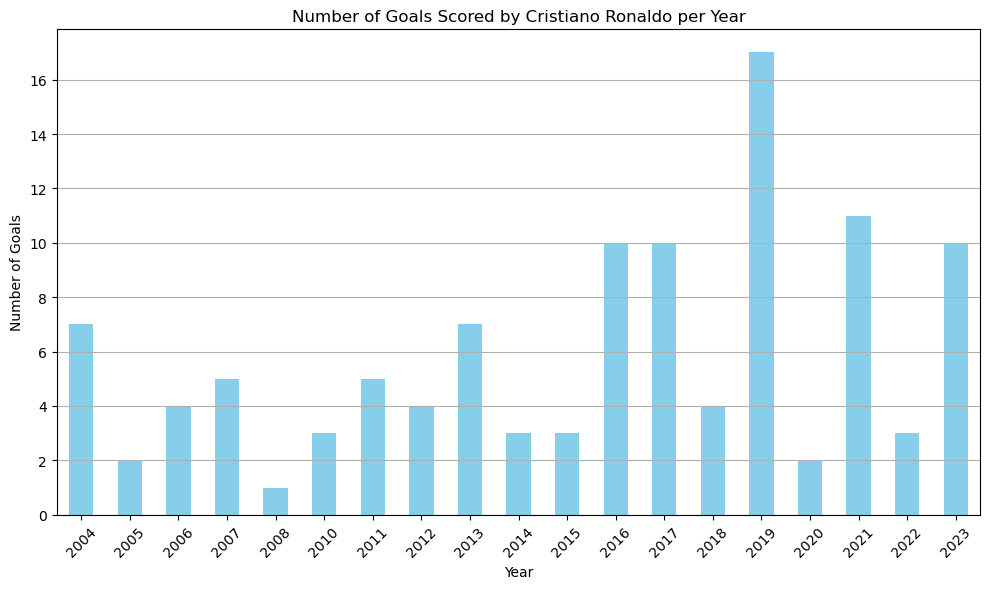

In [59]:
# Filter data for Cristiano Ronaldo
ronaldo_data = merged_df[merged_df['scorer'] == 'Cristiano Ronaldo']

# Convert 'date' column to datetime format
ronaldo_data['date'] = pd.to_datetime(ronaldo_data['date'])

# Extract year from the 'date' column
ronaldo_data['year'] = ronaldo_data['date'].dt.year

# Group by year and count the number of goals scored each year
goals_per_year = ronaldo_data.groupby('year').size()

# Plot the number of goals scored per year
plt.figure(figsize=(10, 6))
goals_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Goals Scored by Cristiano Ronaldo per Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines to y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

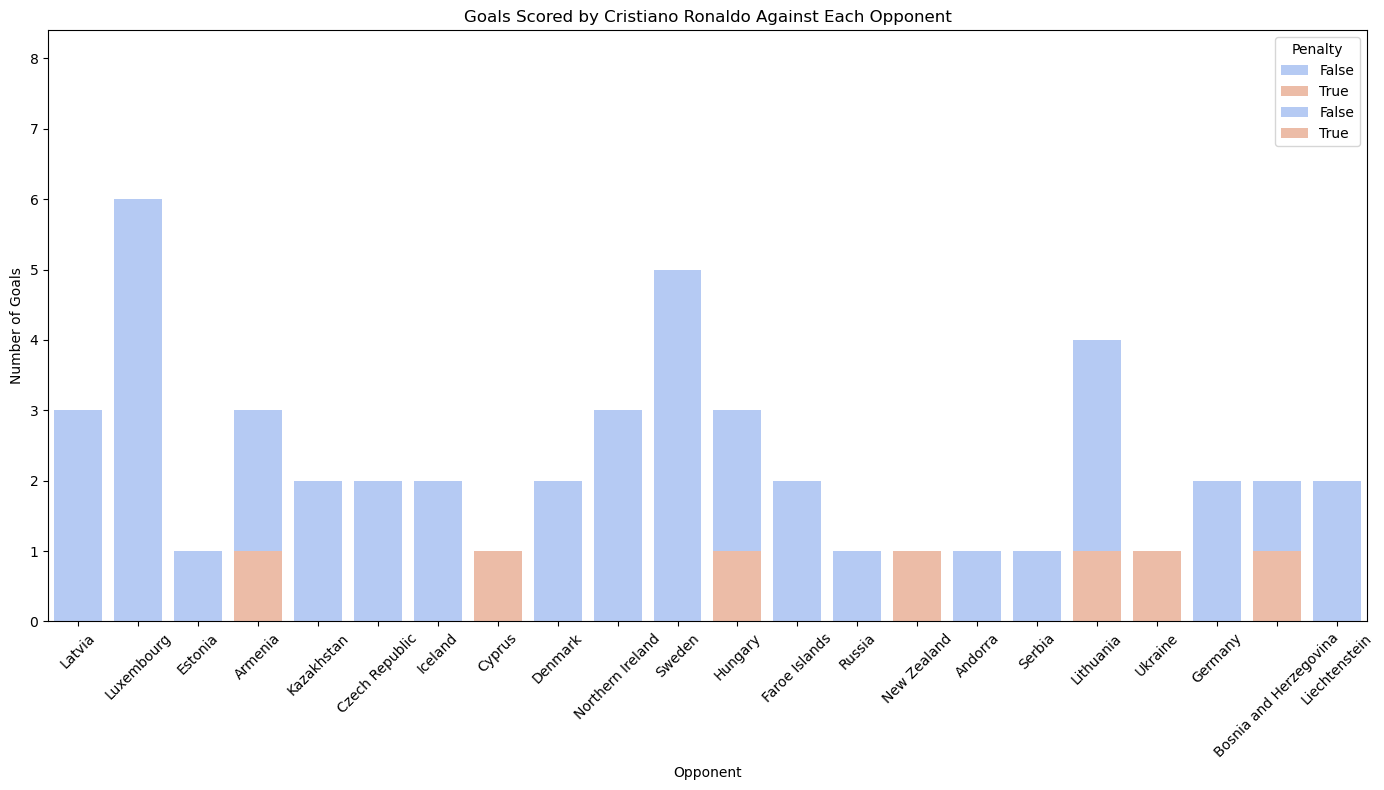

In [60]:
# Create a new column to identify if Ronaldo's team is the home or away team
ronaldo_data['team_status'] = np.where(ronaldo_data['team'] == ronaldo_data['home_team'], 'Home', 'Away')

# Plot the goals scored by Ronaldo against each opponent, distinguishing between home and away matches
plt.figure(figsize=(14, 8))
sns.countplot(x='away_team', data=ronaldo_data[ronaldo_data['team_status'] == 'Home'], hue='penalty', palette='coolwarm', dodge=False)
sns.countplot(x='home_team', data=ronaldo_data[ronaldo_data['team_status'] == 'Away'], hue='penalty', palette='coolwarm', dodge=False)
plt.title('Goals Scored by Cristiano Ronaldo Against Each Opponent')
plt.xlabel('Opponent')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.legend(title='Penalty', loc='upper right')
plt.tight_layout()
plt.show()


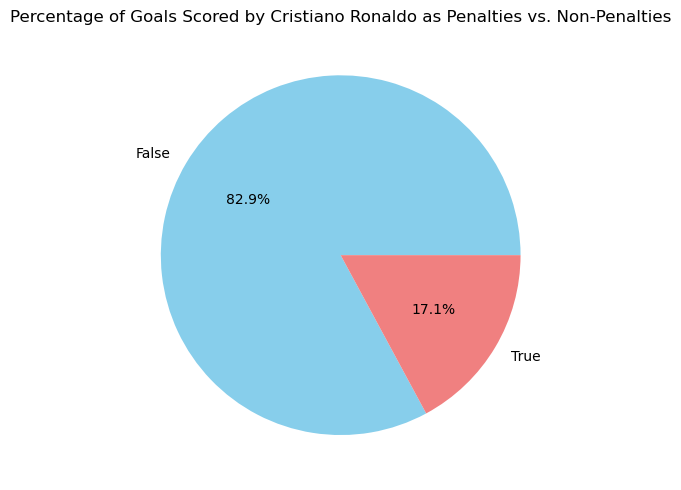

In [61]:
#Number of Goals Scored by Cristiano Ronaldo as Penalties vs. Non-Penalties
plt.figure(figsize=(8, 5))
ronaldo_data['penalty'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Goals Scored by Cristiano Ronaldo as Penalties vs. Non-Penalties')
plt.ylabel('')
plt.tight_layout()
plt.show()

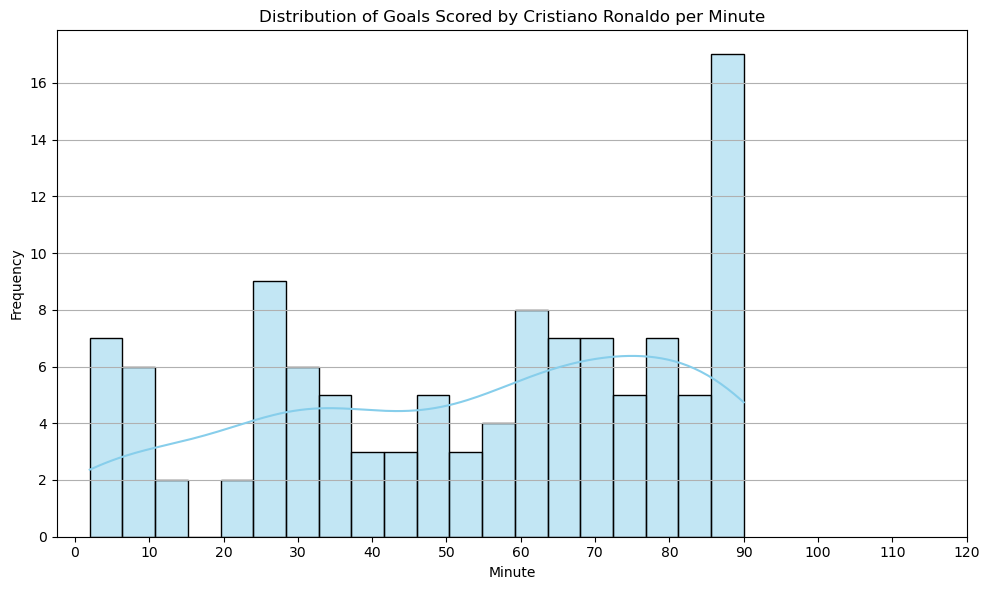

In [62]:
#Distribution of Goals Scored by Cristiano Ronaldo per Minute
plt.figure(figsize=(10, 6))
sns.histplot(ronaldo_data['minute'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Goals Scored by Cristiano Ronaldo per Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.xticks(range(0, 121, 10))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

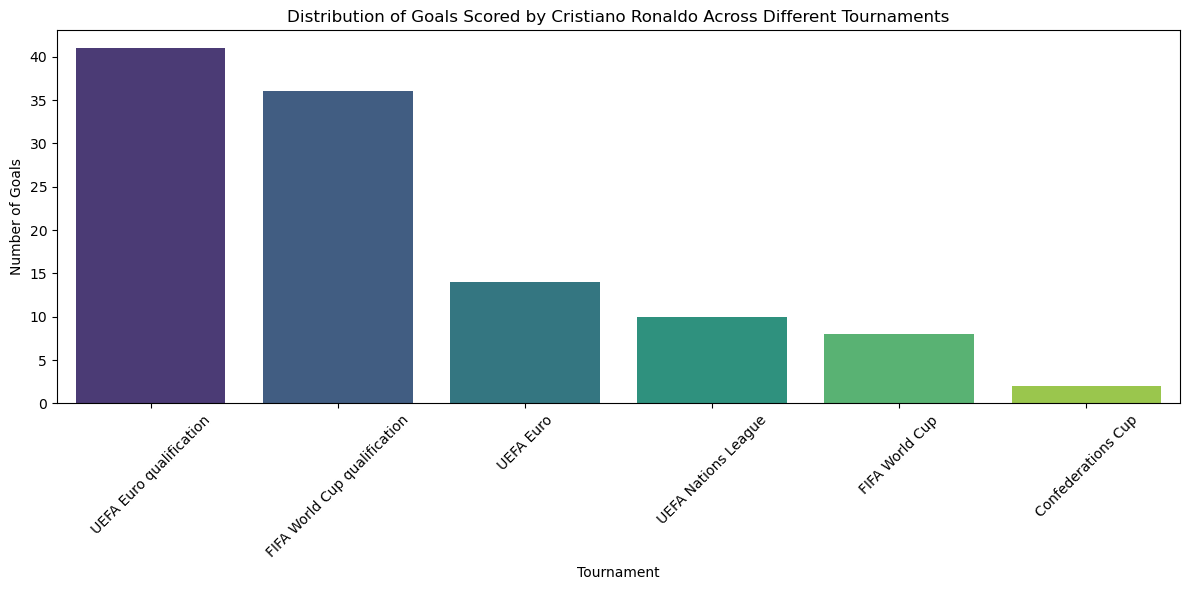

In [63]:
#Distribution of goals scored by the scorer across different tournaments
plt.figure(figsize=(12, 6))
sns.countplot(x='tournament', data=ronaldo_data, palette='viridis', order=ronaldo_data['tournament'].value_counts().index)
plt.title('Distribution of Goals Scored by Cristiano Ronaldo Across Different Tournaments')
plt.xlabel('Tournament')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

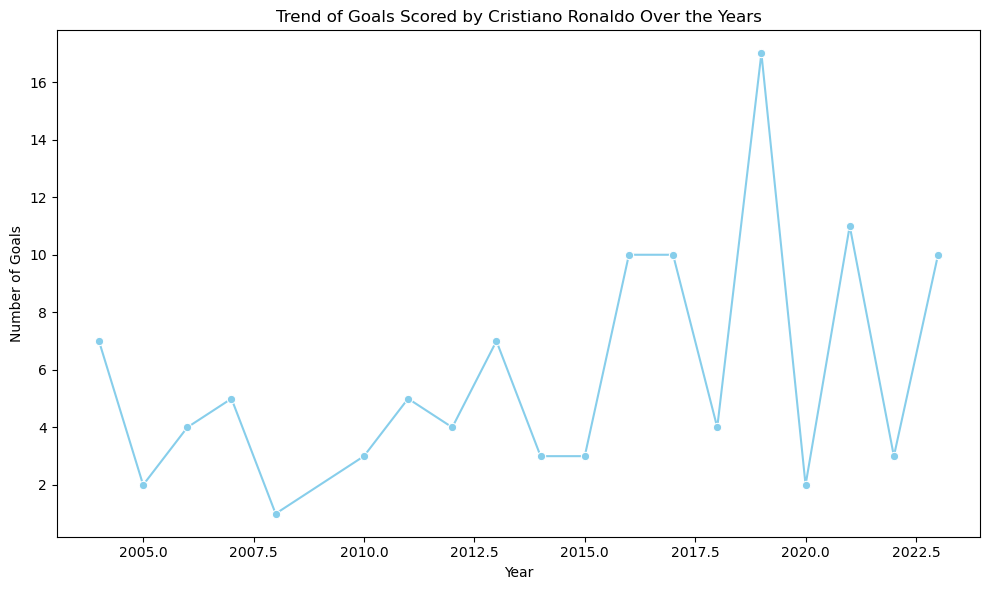

In [64]:
#Trend of goals scored by the scorer over the years
ronaldo_data['year'] = ronaldo_data['date'].dt.year
goals_per_year = ronaldo_data.groupby('year').size().reset_index(name='goals')
plt.figure(figsize=(10, 6))
sns.lineplot(data=goals_per_year, x='year', y='goals', marker='o', color='skyblue')
plt.title('Trend of Goals Scored by Cristiano Ronaldo Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.show()

In [65]:
# Filter data for matches played in Lisbon
ronaldo_lisbon_data = ronaldo_data[ronaldo_data['city'] == 'Lisbon']

# Calculate statistics for Cristiano Ronaldo's performance in Lisbon
lisbon_stats = ronaldo_lisbon_data.agg({
    'scorer': 'count',                    # Total goals scored
    'own_goal': 'sum',                    # Total own goals
    'penalty': 'sum',                     # Total penalties scored
    'minute': 'sum'                       # Total minutes played
})

# Print the statistics
print("Cristiano Ronaldo's performance in Lisbon:")
print("Total goals scored:", lisbon_stats['scorer'])
print("Total own goals:", lisbon_stats['own_goal'])
print("Total penalties scored:", lisbon_stats['penalty'])
print("Total minutes played:", lisbon_stats['minute'])

Cristiano Ronaldo's performance in Lisbon:
Total goals scored: 17.0
Total own goals: 0.0
Total penalties scored: 1.0
Total minutes played: 876.0


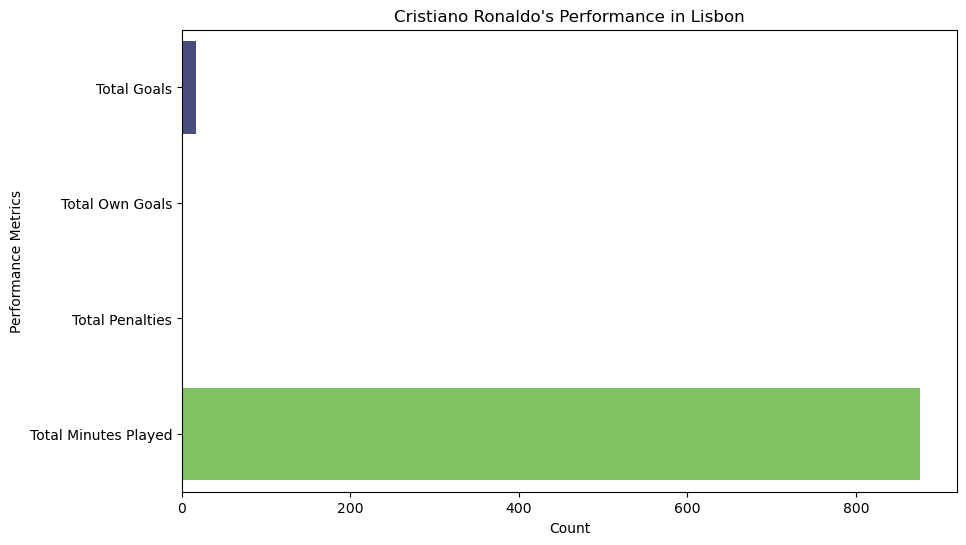

In [66]:
# Define the performance metrics and corresponding values
metrics = ['Total Goals', 'Total Own Goals', 'Total Penalties', 'Total Minutes Played']
values = [lisbon_stats['scorer'], lisbon_stats['own_goal'], lisbon_stats['penalty'], lisbon_stats['minute']]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette="viridis")
plt.title("Cristiano Ronaldo's Performance in Lisbon")
plt.xlabel("Count")
plt.ylabel("Performance Metrics")
plt.show()